In [43]:
import get_processed_data as gpd
import scipy.stats as stats
import pandas as pd
import numpy as np
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt


# Malte

## Calculate means

In [44]:
# Load data
malte_3 = gpd.get_processed_data('malte', ["3"], 900, 180)
malte_6 = gpd.get_processed_data('malte', ["6", "6+"], 900, 180)


Calculate means for acceleration X,Y,Z and rotation X,Y,Z independently

In [45]:
# Acceleration X, Y, Z mean
malte_3_acc_x_mean = [sample["FreeAcc_X"].mean() for sample in malte_3]
malte_3_acc_y_mean = [sample["FreeAcc_Y"].mean() for sample in malte_3]
malte_3_acc_z_mean = [sample["FreeAcc_Z"].mean() for sample in malte_3]

malte_6_acc_x_mean = [sample["FreeAcc_X"].mean() for sample in malte_6]
malte_6_acc_y_mean = [sample["FreeAcc_Y"].mean() for sample in malte_6]
malte_6_acc_z_mean = [sample["FreeAcc_Z"].mean() for sample in malte_6]

# Rotation X, Y, Z mean
malte_3_rot = [[R.from_quat([x["Quat_X"], x["Quat_Y"], x["Quat_Z"], x["Quat_W"]]) for x in sample] for sample in malte_3]
malte_3_rot = [[R.from_quat([x["Quat_X"], x["Quat_Y"], x["Quat_Z"], x["Quat_W"]]) for x in sample] for sample in malte_3]

malte_3_rot_x_mean = [np.mean([x.as_euler("xyz")[0] for x in sample]) for sample in malte_3_rot]
malte_3_rot_y_mean = [np.mean([x.as_euler("xyz")[1] for x in sample]) for sample in malte_3_rot]
malte_3_rot_z_mean = [np.mean([x.as_euler("xyz")[2] for x in sample]) for sample in malte_3_rot]

malte_6_rot = [[R.from_quat([x["Quat_X"], x["Quat_Y"], x["Quat_Z"], x["Quat_W"]]) for x in sample] for sample in malte_6]
malte_6_rot = [[R.from_quat([x["Quat_X"], x["Quat_Y"], x["Quat_Z"], x["Quat_W"]]) for x in sample] for sample in malte_6]

malte_6_rot_x_mean = [np.mean([x.as_euler("xyz")[0] for x in sample]) for sample in malte_6_rot]
malte_6_rot_y_mean = [np.mean([x.as_euler("xyz")[1] for x in sample]) for sample in malte_6_rot]
malte_6_rot_z_mean = [np.mean([x.as_euler("xyz")[2] for x in sample]) for sample in malte_6_rot]

Calculate acceleration magnitude means

In [46]:
# Calculate acceleration magnitudes
malte_3_acc_mag = [(sample["FreeAcc_X"]**2 + sample["FreeAcc_Y"]**2 + sample["FreeAcc_Z"]**2)**0.5 for sample in malte_3]
malte_6_acc_mag = [(sample["FreeAcc_X"]**2 + sample["FreeAcc_Y"]**2 + sample["FreeAcc_Z"]**2)**0.5 for sample in malte_6]

# Calculate acceleration magnitude means
malte_3_acc_mag_means = [x.mean() for x in malte_3_acc_mag]
malte_6_acc_mag_means = [x.mean() for x in malte_6_acc_mag]

Calculate angular velocity means

In [47]:
# Get rotation matrices
malte_3_rot = [[R.from_quat([x["Quat_X"], x["Quat_Y"], x["Quat_Z"], x["Quat_W"]]) for x in sample] for sample in malte_3]
malte_6_rot = [[R.from_quat([x["Quat_X"], x["Quat_Y"], x["Quat_Z"], x["Quat_W"]]) for x in sample] for sample in malte_6]

# Calculate rotation differences for each sample
malte_3_rot_diff = [[sample[i+1].inv() * sample[i] for i in range(len(sample)-1)] for sample in malte_3_rot]
malte_6_rot_diff = [[sample[i+1].inv() * sample[i] for i in range(len(sample)-1)] for sample in malte_6_rot]

# Convert to rotation vectors
malte_3_rot_diff_vec = [[x.as_rotvec() for x in sample] for sample in malte_3_rot_diff]
malte_6_rot_diff_vec = [[x.as_rotvec() for x in sample] for sample in malte_6_rot_diff]

# Calculate magnitude of rotation vectors
malte_3_rot_diff_vec_mag = [[np.linalg.norm(x) for x in sample] for sample in malte_3_rot_diff_vec]
malte_6_rot_diff_vec_mag = [[np.linalg.norm(x) for x in sample] for sample in malte_6_rot_diff_vec]

# Calculate mean of rotation vector magnitudes
malte_3_rot_diff_vec_mag_mean = [np.mean(x) for x in malte_3_rot_diff_vec_mag]
malte_6_rot_diff_vec_mag_mean = [np.mean(x) for x in malte_6_rot_diff_vec_mag]


## Q-Q plots & Shapiro-Wilk test for normality with alpha = 0.05

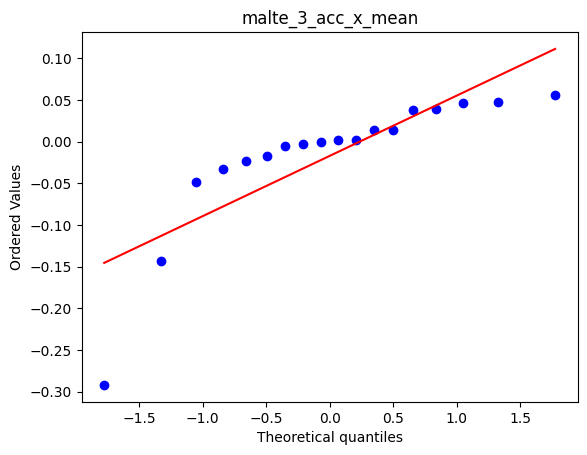

ShapiroResult(statistic=0.7083563122998545, pvalue=0.00010003586685764033)
Is normally distributed:  False


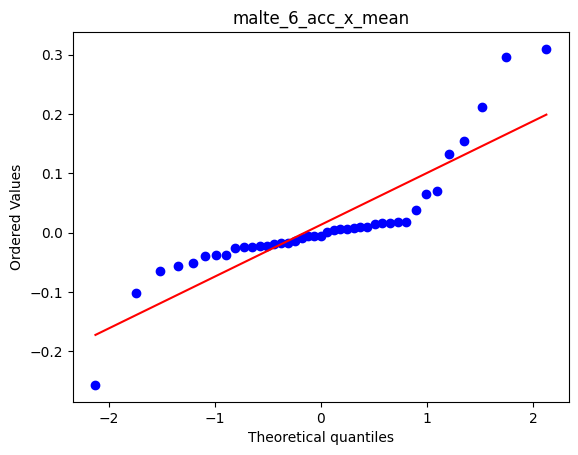

ShapiroResult(statistic=0.7986610293239664, pvalue=5.127776251567791e-06)
Is normally distributed:  False


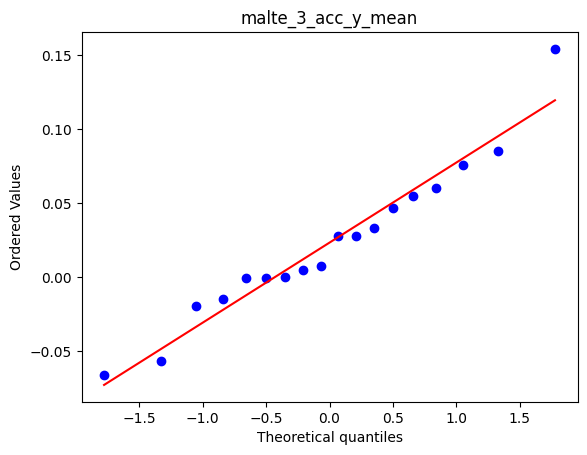

ShapiroResult(statistic=0.962454623686086, pvalue=0.6496328247502405)
Is normally distributed:  True


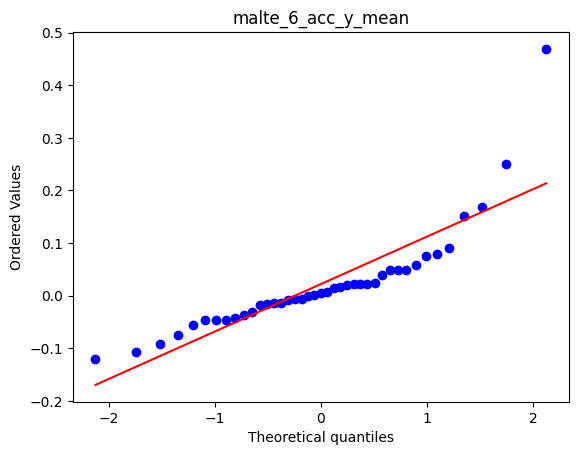

ShapiroResult(statistic=0.7787560459164674, pvalue=2.0094047250803697e-06)
Is normally distributed:  False


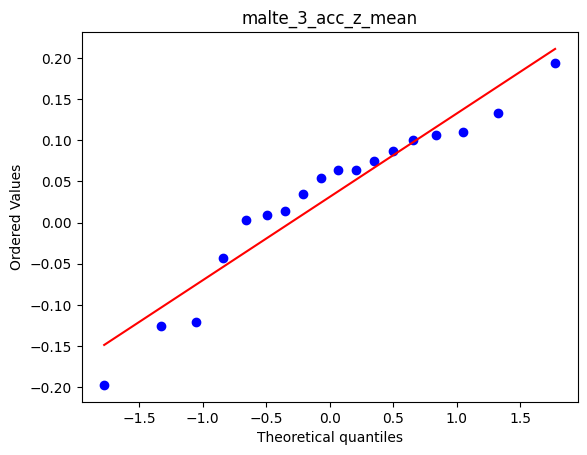

ShapiroResult(statistic=0.9315117082033187, pvalue=0.2064329940805861)
Is normally distributed:  True


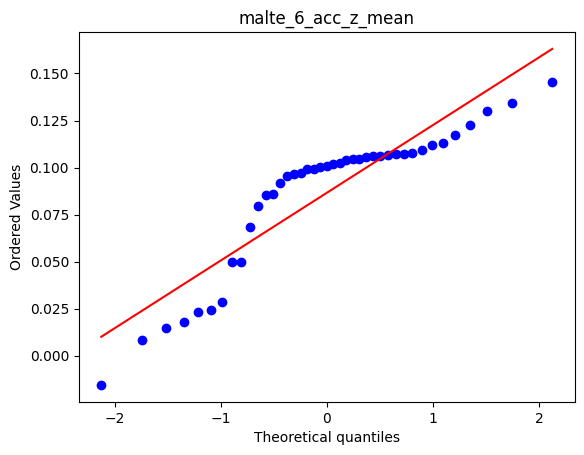

ShapiroResult(statistic=0.8443412928313186, pvalue=5.4554922688804396e-05)
Is normally distributed:  False


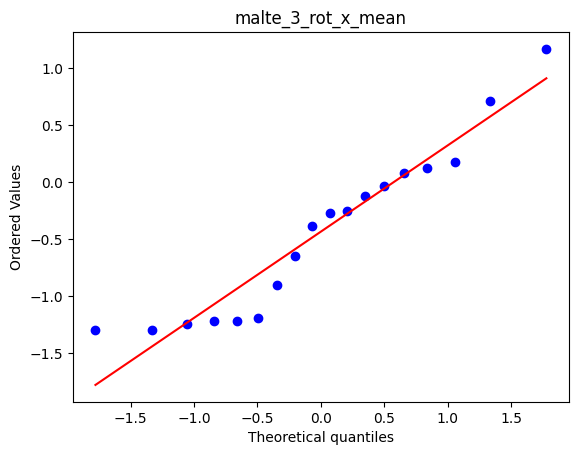

ShapiroResult(statistic=0.9140045148808789, pvalue=0.10124493401761532)
Is normally distributed:  True


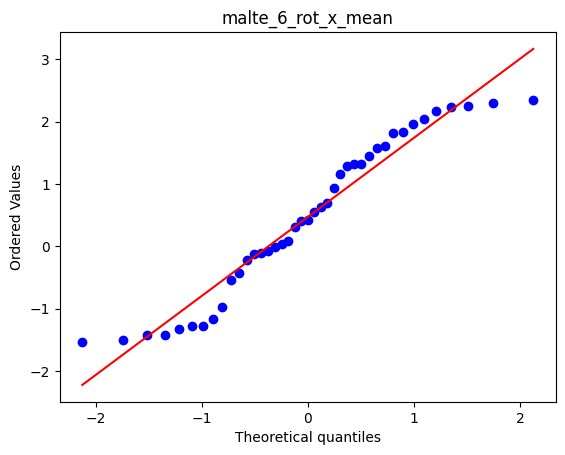

ShapiroResult(statistic=0.9323287575027812, pvalue=0.01726738594807724)
Is normally distributed:  False


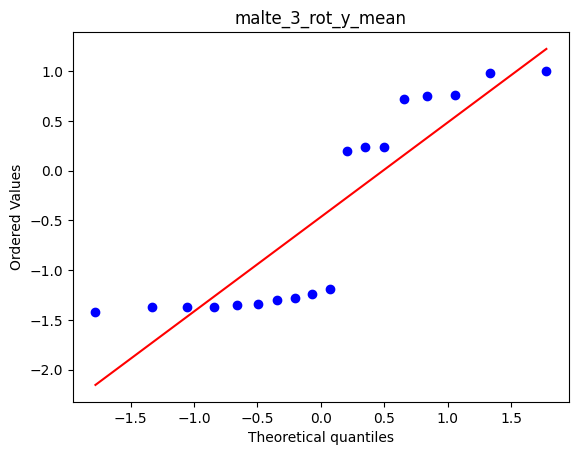

ShapiroResult(statistic=0.7594952053974798, pvalue=0.00042952700018781566)
Is normally distributed:  False


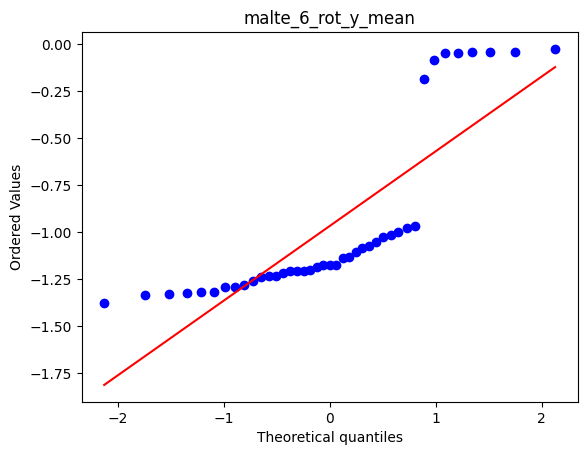

ShapiroResult(statistic=0.6875210508560248, pvalue=4.696545355367058e-08)
Is normally distributed:  False


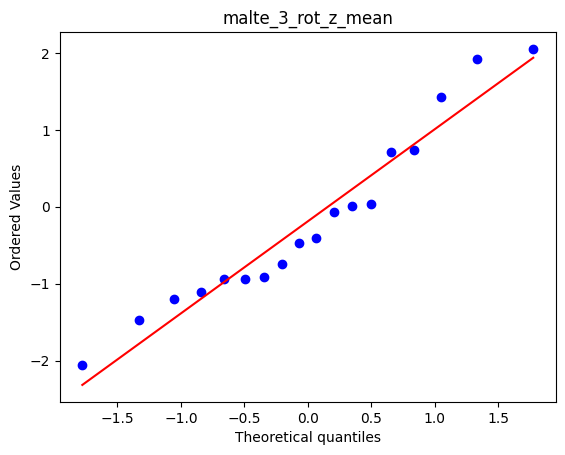

ShapiroResult(statistic=0.9412606518129936, pvalue=0.3044976470994167)
Is normally distributed:  True


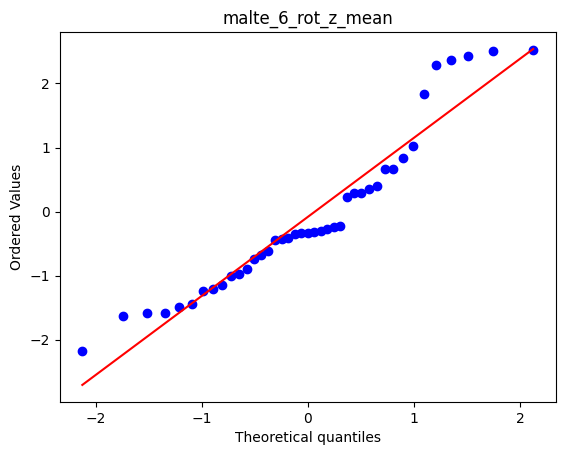

ShapiroResult(statistic=0.9178595964493629, pvalue=0.005831955850774547)
Is normally distributed:  False


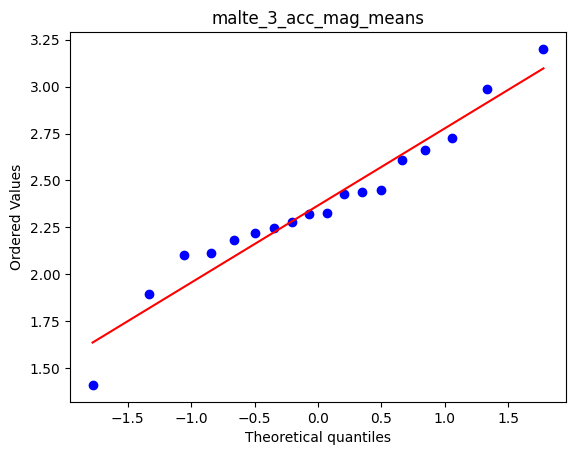

ShapiroResult(statistic=0.9623753827875088, pvalue=0.6480678771678092)
Is normally distributed:  True


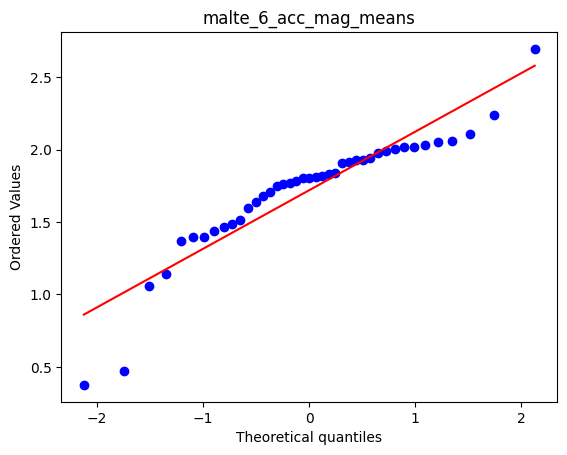

ShapiroResult(statistic=0.8812280085425799, pvalue=0.0004845063471237486)
Is normally distributed:  False


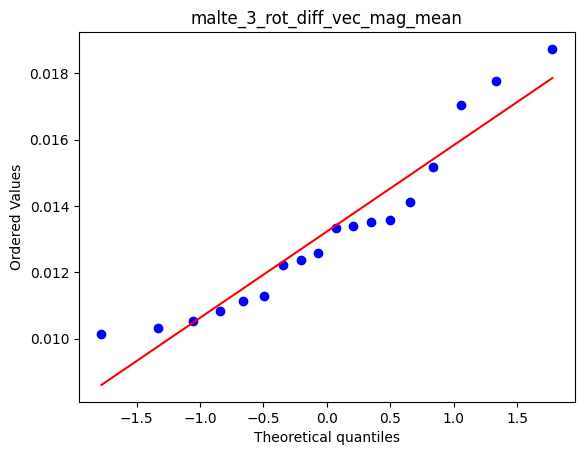

ShapiroResult(statistic=0.9103385825758356, pvalue=0.08722417124567206)
Is normally distributed:  True


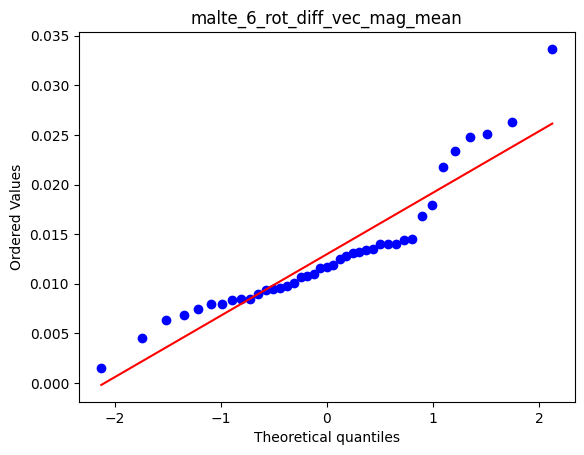

ShapiroResult(statistic=0.8881615297303112, pvalue=0.0007553970953573495)
Is normally distributed:  False


In [48]:
alpha = 0.05
features = ["malte_3_acc_x_mean", "malte_6_acc_x_mean", "malte_3_acc_y_mean", "malte_6_acc_y_mean", "malte_3_acc_z_mean", "malte_6_acc_z_mean", "malte_3_rot_x_mean", "malte_6_rot_x_mean", "malte_3_rot_y_mean", "malte_6_rot_y_mean", "malte_3_rot_z_mean", "malte_6_rot_z_mean", "malte_3_acc_mag_means", "malte_6_acc_mag_means", "malte_3_rot_diff_vec_mag_mean", "malte_6_rot_diff_vec_mag_mean"]

for feature_name in features:
    feature = eval(feature_name)
    stats.probplot(feature, dist="norm", plot=plt)
    plt.title(feature_name)
    plt.show()

    shapiro_test = stats.shapiro(feature)
    print(shapiro_test)
    print("Is normally distributed: ", shapiro_test[1] > alpha)


# Luis

In [49]:
# get data from luis
luis_3_1 = gpd.processed_data_luis["3"][0]
luis_3_2 = gpd.processed_data_luis["3"][1]
luis_5_1 = gpd.processed_data_luis["5"][0]
luis_5_2 = gpd.processed_data_luis["5-"][0]

# calculate magnitude from "FreeAcc_X", "FreeAcc_Y", "FreeAcc_Z"
luis_3_1_mag = (luis_3_1["FreeAcc_X"]**2 + luis_3_1["FreeAcc_Y"]**2 + luis_3_1["FreeAcc_Z"]**2)**0.5
luis_3_2_mag = (luis_3_2["FreeAcc_X"]**2 + luis_3_2["FreeAcc_Y"]**2 + luis_3_2["FreeAcc_Z"]**2)**0.5
luis_5_1_mag  = (luis_5_1["FreeAcc_X"]**2 + luis_5_1["FreeAcc_Y"]**2 + luis_5_1["FreeAcc_Z"]**2)**0.5
luis_5_2_mag  = (luis_5_2["FreeAcc_X"]**2 + luis_5_2["FreeAcc_Y"]**2 + luis_5_2["FreeAcc_Z"]**2)**0.5

# calculate means
luis_3_mag_mean = [luis_3_1_mag.mean(), luis_3_2_mag.mean()]
luis_5_mag_mean = [luis_5_1_mag.mean(), luis_5_2_mag.mean()]

print("luis_3_mag_mean: ", luis_3_mag_mean)
print("luis_5_mag_mean: ", luis_5_mag_mean)

luis_3_mag_mean:  [2.5042392966078735, 3.3264499197565187]
luis_5_mag_mean:  [1.7067827262625401, 2.4449636967854067]


In [50]:
# calculate t-test
t_stat, p_val = stats.ttest_ind(luis_3_mag_mean, luis_5_mag_mean)
print("t-statistic: ", t_stat)
print("p-value ", p_val)

t-statistic:  1.5194572264623203
p-value  0.2679970732350144


In [51]:
# calculate Wilcoxon test
w_stat, p_val = stats.wilcoxon(luis_3_mag_mean, luis_5_mag_mean)
print("w-statistic: ", w_stat)
print("p-value ", p_val)

w-statistic:  0.0
p-value  0.5
